In [10]:
import gym
import numpy as np
import itertools
import matplotlib
import pandas as pd
import sys

if "../"not in sys.path:
    sys.path.append("../")
    
from collections import defaultdict
from lib.envs.windy_gridworld import WindyGridworldEnv

from lib import plotting
matplotlib.style.use('ggplot')

In [11]:
env = WindyGridworldEnv()

In [12]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    def policy_fn(observation):
        A = np.ones(nA, dtype=float)*epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

In [13]:
def sarsa(env, num_episodes, discount_factor = 1.0, alpha=0.5, epsilon=0.1):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    #keep track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths = np.zeros(num_episodes), 
        episode_rewards = np.zeros(num_episodes))
    
    #the policy we are following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    for i_episode in range(num_episodes):
        #print out which episode we are on, useful for debugging
        if (i_episode + 1) % 100 == 0:
            print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="")
            sys.stdout.flush()
        
        #reset the environment and pick the first action
        state = env.reset()
        action_probs = policy(state)
        action = np.random.choice(np.arange(len(action_probs)), p = action_probs)
        #one step in the environment 
        for t in itertools.count():
            #take a step
            next_state, reward, done, _ = env.step(action)
            
            #pick the next action
            next_action_probs = policy(next_state)
            next_action = np.random.choice(np.arange(len(next_action_probs)), p=next_action_probs)
            
            #update statistic
            stats.episode_rewards[i_episode] += reward
            stats.episode_lengths[i_episode] = t
            
            #TD update
            td_target = reward + discount_factor*Q[next_state][next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha*td_delta
            
            if done:
                break
                
            action = next_action
            state = next_state
            
    return Q, stats
    

In [14]:
Q, stats = sarsa(env, 200)

Episode 200/200.

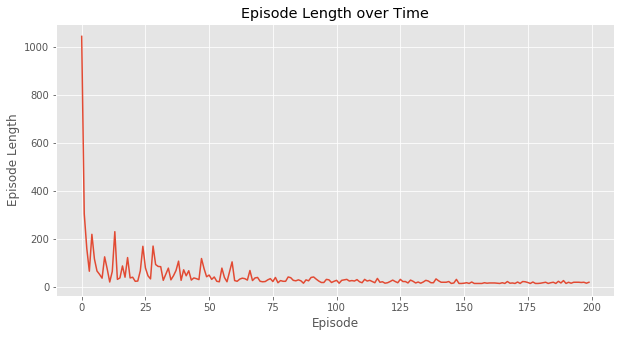

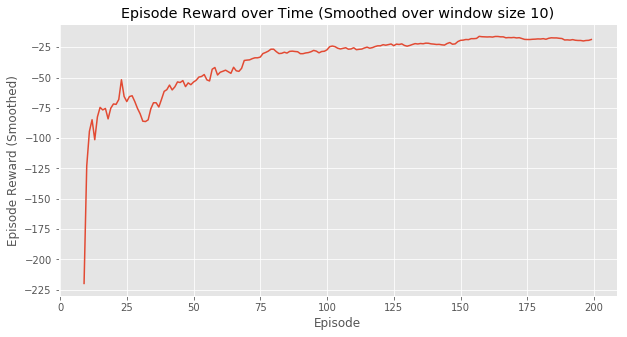

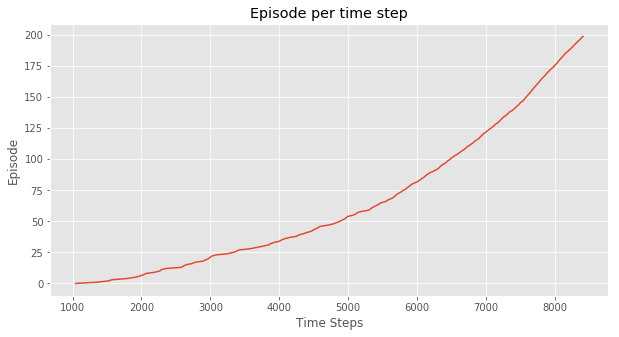

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [16]:
#plotting.plot_episode_stats(stats)
plotting.plot_episode_stats(stats)